# Investigating Mobile App Store Data

## I. Introduction

In order to gain improved domain knowledge of the mobile app space, the data set of the most frequently rated mobile apps from the appstore in 2017 will be analyzed. We can answer such questions as:


* Which genres have higher average user ratings?
* Do user ratings in general skew negative or positive?
* Which metrics does the price of an app affect? Are free apps higher rated than paid apps?
* Which variables have the highest correlation with average user rating?

Source: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

## Getting Started: Loading the data

The data set consists of two csv files one 'AppleStore.csv' contains the metrics of each apps such as average user ratings, prime genre, and price. Whereas 'appleStore_description.csv' contains the description of each app. In this study we will mostly be looking at 'AppleStore.csv' and loading into a variable called `store`.

In [1]:
import os
import numpy as np
import pandas as pd

os.listdir('./data/')

['AppleStore.csv', 'appleStore_description.csv']

In [2]:
store = pd.read_csv('./data/AppleStore.csv')
description = pd.read_csv('./data/appleStore_description.csv')

In [7]:
print(store.shape)
store=store.drop(['Unnamed: 0','currency'],axis=1,errors='ignore')
display(store.head())

(7197, 16)


,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [36]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [34]:
print("Average Ratings")
averages = []
for g in store.prime_genre.unique():
    avg = round(np.mean(store[store.prime_genre==g].user_rating),2)
    averages.append((g, avg))
avg_ratings_genre=pd.DataFrame(averages, columns=['genre','average rating']).sort_values(by='average rating',ascending=False).reset_index(drop=True)
avg_ratings_genre

Average Ratings


,genre,average rating
0,Productivity,4.01
1,Music,3.98
2,Photo & Video,3.80
3,Business,3.75
4,Health & Fitness,3.70
5,Games,3.69
6,Weather,3.60
7,Shopping,3.54
8,Reference,3.45
9,Travel,3.38


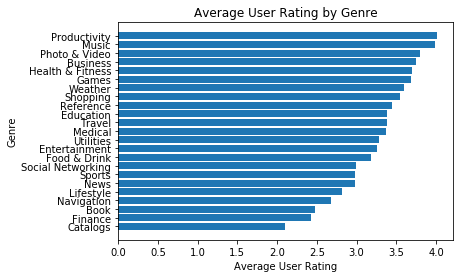

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
avg_ratings_genre=avg_ratings_genre.sort_values(by='average rating',ascending=True).reset_index(drop=True)
plt.barh(y=avg_ratings_genre['genre'],width=avg_ratings_genre['average rating'])
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.title('Average User Rating by Genre')

plt.show()